In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation,Conv2D,MaxPooling2D
from sklearn.metrics import accuracy_score

C:\Users\thithi_Lab\Anaconda3\envs\notebook\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\thithi_Lab\Anaconda3\envs\notebook\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\thithi_Lab\Anaconda3\envs\notebook\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\thithi_Lab\Anaconda3\envs\notebook\lib\s

In [2]:
import os #it is used for pointing the directory
print(os.listdir("../dog_vs_cat")) #check what files in the dog_vs_cat folder

['.ipynb_checkpoints', 'Dog_Vs_Cat.ipynb', 'sampleSubmission.csv', 'submission1.csv', 'TCL_Rcode.ipynb', 'test1', 'train']


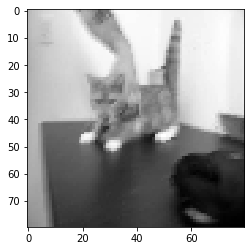

In [3]:
main_dir = "../dog_vs_cat/"
train_dir = "train" #give the directory in order to train
path = os.path.join(main_dir,train_dir) #giving path

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [4]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category) #dog and cat

In [5]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [6]:
#Normalize data
X = X/255.0

In [7]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20000/20000 [==============================] - 315s 16ms/sample - loss: 0.6053 - acc: 0.6726 - val_loss: 0.4617 - val_acc: 0.7910
Epoch 2/10
20000/20000 [==============================] - 324s 16ms/sample - loss: 0.5050 - acc: 0.7548 - val_loss: 0.7861 - val_acc: 0.5354
Epoch 3/10
20000/20000 [==============================] - 323s 16ms/sample - loss: 0.4571 - acc: 0.7875 - val_loss: 0.6994 - val_acc: 0.6296
Epoch 4/10
20000/20000 [==============================] - 324s 16ms/sample - loss: 0.4226 - acc: 0.8082 - val_loss: 0.6729 - val_acc: 0.6750
Epoch 5/10
20000/20000 [==============================] - 325s 16ms/sample - loss: 0.3868 - acc: 0.8272 - val_loss: 0.7944 - val_acc: 0.6106
Epoch 6/10
20000/20000 [==============================] - 325s 16ms/sample - loss: 0.3538 - acc: 0.8453 - val_loss: 0.9313 - val_acc: 0.5858
Epoch 7/10
20000/20000 [==============================] -

In [9]:
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [10]:
predictions = model.predict(X_test)

In [16]:
predicted_val = [int(round(p[0])) for p in predictions]

In [17]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [18]:
submission_df.to_csv("submission1.csv", index=False)

In [20]:
import pandas as pd
data = pd.read_csv("submission1.csv")
data.head(10)

,id,label
0,cat,0
1,cat,0
2,cat,0
3,cat,0
4,cat,0
5,cat,0
6,cat,0
7,cat,1
8,cat,0
9,cat,0
